<h2>Predictive Modeling for Customer Churn<h2>


Objective: <br>
The objective of this assignment is to build a predictive model that can predict customer churn for a given company. 
The intern will use machine learning techniques to build the model and document the process, including feature selection, model evaluation, and performance metrics.



Import data

Input variables:
   bank client data:
<br>1 - age (numeric)
<br>2 - job : type of job (categorical:min.","unknown","unemployed","management","housemaid","entrepreneur","stude,"bluecollar","selfloyed","retired","technician","services") 
<br>3 - marital : marital status (categorical: "married","divorced","single"; <br>e: "divorced" means divorced or widowed)
<br>4 - education (categorical: "unknown","secondary","primary","tertiary")
<br>5 - default: has credit in default? (binary: "yes","no")
<br>6 - balance: average yearly balance, in euros (numeric) 
<br>7 - housing: has housing loan? (binary: "yes","no")
<br>8 - loan: has personal loan? (binary: "yes","no")
<br># related with the last contact of the current campaign:
<br>9 - contact: contact communication type (categorical: <br>known","telephone","cellular") 
<br>0 - day: last contact day of the month (numeric)
<br>1 - month: last contact month of year (categorical: "jan", "feb", "mar", <br>, "nov", "dec")
<br>2 - duration: last contact duration, in seconds (numeric)
<br># other attributes:
<br>3 - campaign: number of contacts performed during this campaign and for <br>s client (numeric, includes last contact)
<br>4 - pdays: number of days that passed by after the client was last <br>tacted from a previous campaign (numeric, -1 means client was not <br>viously contacted)
<br>5 - previous: number of contacts performed before this campaign and for <br>s client (numeric)
<br>6 - poutcome: outcome of the previous marketing campaign (categorical: <br>known","other","failure","success")
<br>
<br>utput variable (desired target):
<br>7 - y - has the client subscribed a term deposit? (binary: "yes","no")

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [3]:
data = pd.read_csv('bank.csv',sep=";")
data = data.rename(columns={'y':'Subscribed'})
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Lets Look for null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         4521 non-null   int64 
 1   job         4521 non-null   object
 2   marital     4521 non-null   object
 3   education   4521 non-null   object
 4   default     4521 non-null   object
 5   balance     4521 non-null   int64 
 6   housing     4521 non-null   object
 7   loan        4521 non-null   object
 8   contact     4521 non-null   object
 9   day         4521 non-null   int64 
 10  month       4521 non-null   object
 11  duration    4521 non-null   int64 
 12  campaign    4521 non-null   int64 
 13  pdays       4521 non-null   int64 
 14  previous    4521 non-null   int64 
 15  poutcome    4521 non-null   object
 16  Subscribed  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
data.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
Subscribed    0
dtype: int64

The data seems to be not null and without any NA values

## Exploratory Data Analysis¶


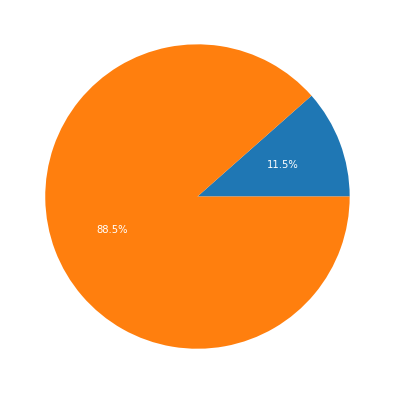

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


sizes = [data.Subscribed[data['Subscribed']=="yes"].count(), data.Subscribed[data['Subscribed']=="no"].count()]


fig = plt.figure(figsize = (10,7))
plt.pie(sizes, autopct='%1.1f%%', textprops={'color':"w"},labels=["Yes","No"])

plt.show()

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Subscribed'],
      dtype='object')

<AxesSubplot:xlabel='education', ylabel='count'>

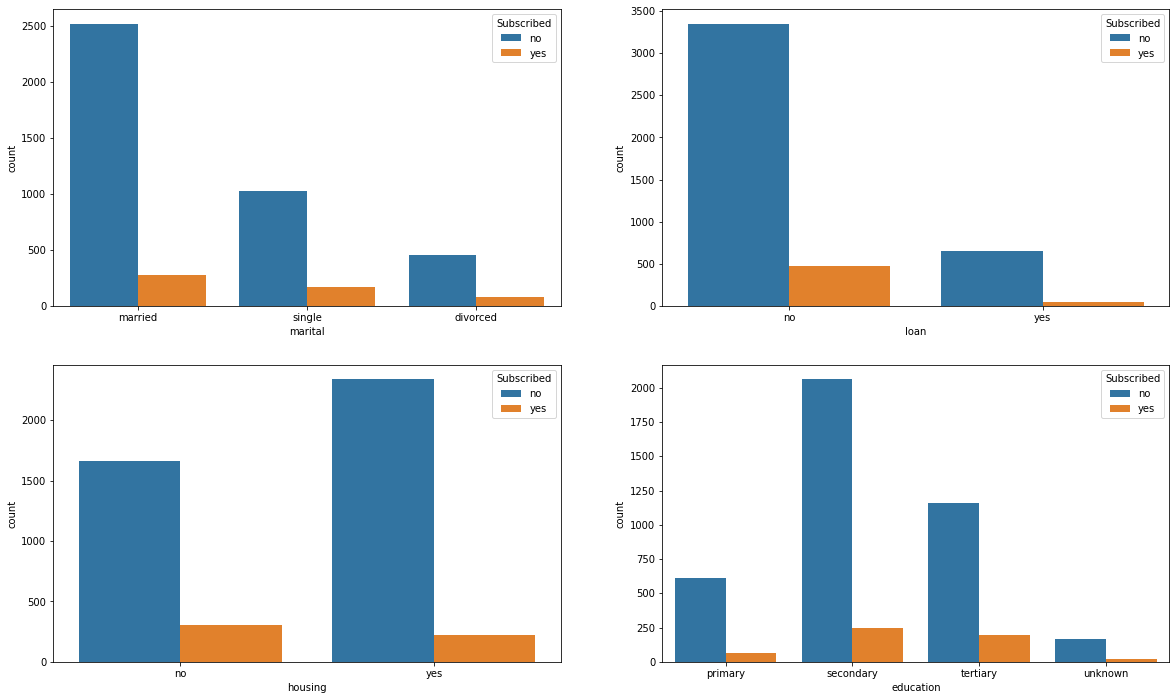

In [8]:
# We first review the 'Subscribed' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='marital', hue = 'Subscribed',data = data, ax=axarr[0][0])
sns.countplot(x='loan', hue = 'Subscribed',data = data, ax=axarr[0][1])
sns.countplot(x='housing', hue = 'Subscribed',data = data, ax=axarr[1][0])
sns.countplot(x='education', hue = 'Subscribed',data = data, ax=axarr[1][1])

We can derive following conclusions from above:<br>
1. No. of conversions are higher if the customer is married <br>
2. If they have a load
3. Highest conversions observed for secondary and tertiary education followed by primary
4. Housing doesnt seem to have very vast difference in conversion rates

<AxesSubplot:xlabel='Subscribed', ylabel='previous'>

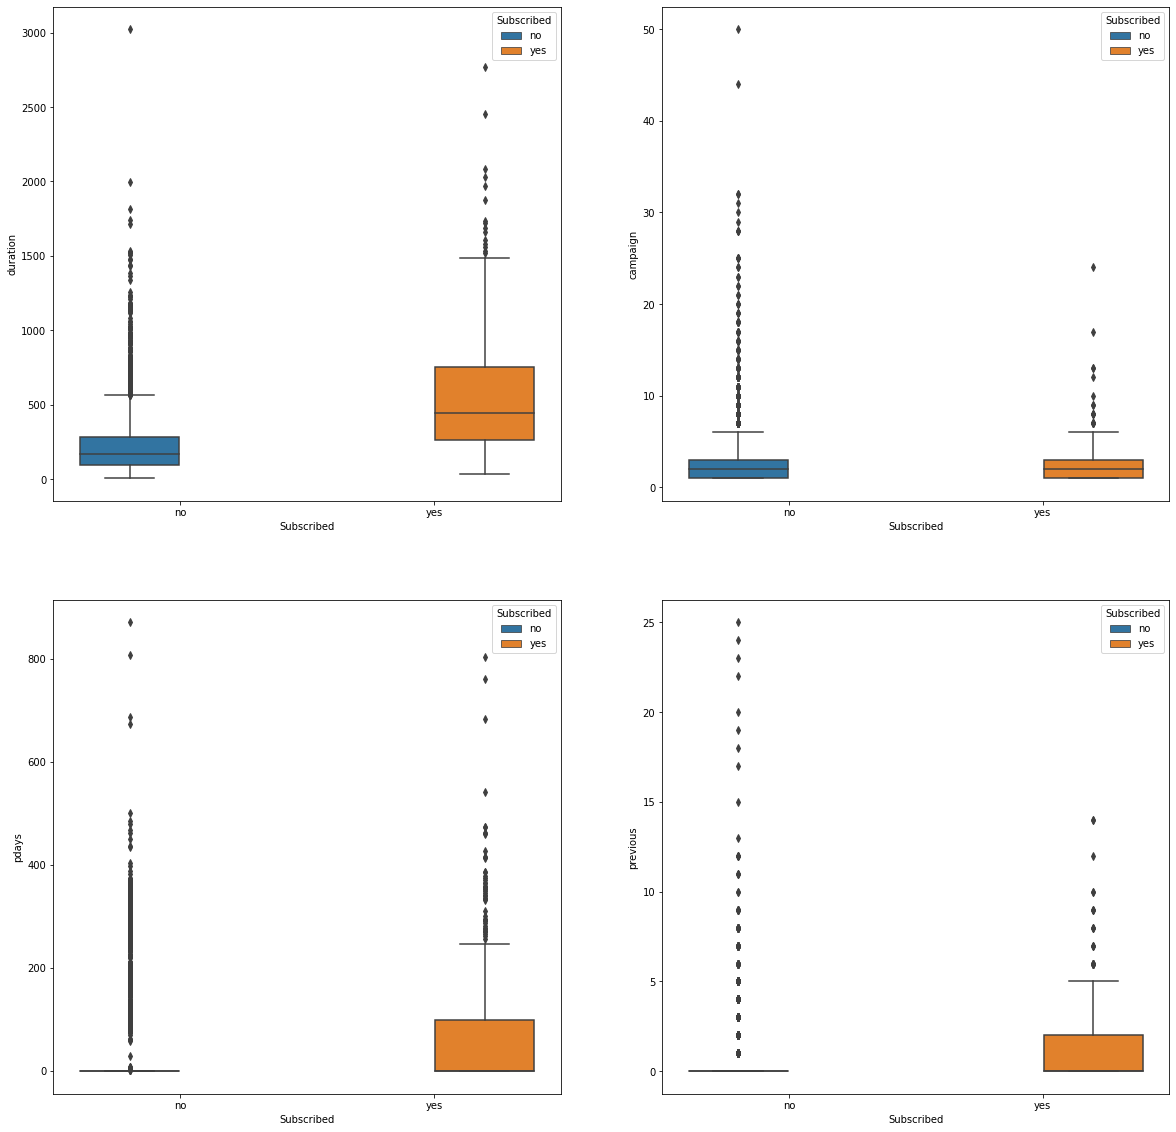

In [9]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(y='duration',x = 'Subscribed', hue = 'Subscribed',data = data , ax=axarr[0][0])
sns.boxplot(y='campaign',x = 'Subscribed', hue = 'Subscribed',data = data, ax=axarr[0][1])
sns.boxplot(y='pdays',x = 'Subscribed', hue = 'Subscribed',data = data, ax=axarr[1][0])
sns.boxplot(y='previous',x = 'Subscribed', hue = 'Subscribed',data = data, ax=axarr[1][1])


All kind of contacts seems to have an effect on churn 

In [10]:
data['age_bins'] = pd.cut(x=data['age'], bins=[20, 30, 40, 50,60,70,80])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed,age_bins
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,"(20, 30]"
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,"(30, 40]"
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,"(30, 40]"
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,"(20, 30]"
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,"(50, 60]"


<AxesSubplot:xlabel='age_bins', ylabel='balance'>

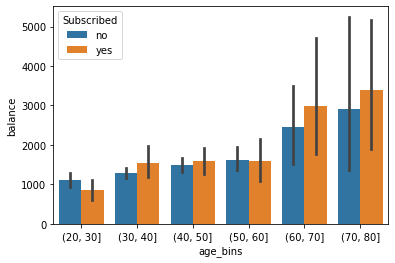

In [11]:
sns.barplot(data=data,x = data['age_bins'] ,y=data["balance"],hue = data['Subscribed'])


Here we can see that most of the subscribers are in the age range of 50 - 80 with largest contribution by 70-80 age group

### Feature Selection:
1. Age
2. Balance
3. Duration
4. Campaign
5. Pdays

In [12]:
labels = ['age','balance','duration','campaign','pdays','Subscribed'] 
df = data[labels]
df

,age,balance,duration,campaign,pdays,Subscribed
0,30,1787,79,1,-1,no
1,33,4789,220,1,339,no
2,35,1350,185,1,330,no
3,30,1476,199,4,-1,no
4,59,0,226,1,-1,no
...,...,...,...,...,...,...
4516,33,-333,329,5,-1,no
4517,57,-3313,153,1,-1,no
4518,57,295,151,11,-1,no
4519,28,1137,129,4,211,no


C:\Users\HP\AppData\Local\Temp/ipykernel_1148/3009306964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balancebyage'] = df['balance']/df['age']


<AxesSubplot:xlabel='Subscribed', ylabel='balance'>

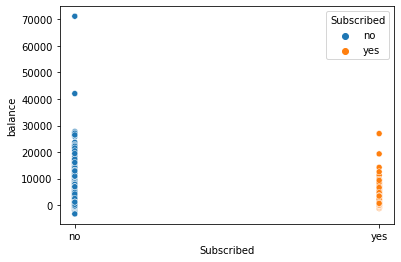

In [13]:
df['balancebyage'] = df['balance']/df['age']
df
sns.scatterplot(y = df['balance'],x  = data['Subscribed'], hue=data['Subscribed'], data = data)


balance/age ratio have no effect 

In [14]:
#df.drop(labels=['agebybalance'],axis = 1,inplace = True)

Converting categorial values to numerical variable in Subscribed column <br>
Yes : 1
No : 0



In [15]:
df['Subscribed'] = df["Subscribed"].replace({'yes':1,'no':0})
df

C:\Users\HP\AppData\Local\Temp/ipykernel_1148/2429986779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subscribed'] = df["Subscribed"].replace({'yes':1,'no':0})


,age,balance,duration,campaign,pdays,Subscribed,balancebyage
0,30,1787,79,1,-1,0,59.566667
1,33,4789,220,1,339,0,145.121212
2,35,1350,185,1,330,0,38.571429
3,30,1476,199,4,-1,0,49.200000
4,59,0,226,1,-1,0,0.000000
...,...,...,...,...,...,...,...
4516,33,-333,329,5,-1,0,-10.090909
4517,57,-3313,153,1,-1,0,-58.122807
4518,57,295,151,11,-1,0,5.175439
4519,28,1137,129,4,211,0,40.607143


Normalizing the dataset using min_max

In [32]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
new_df = normalize(df)
new_df
maxVec = df[labels].max()
minVec = df[labels].min()

## Model

In [17]:
df_train = new_df.sample(frac=0.8,random_state=200)
df_test = new_df.drop(df_train.index)
#print(len(df_train))

In [18]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [19]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [21]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Subscribed'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,df_train.Subscribed)
best_model(log_pol2_Grid)

0.8885792775650871
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=300, solver='liblinear')


In [22]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Subscribed'],df_train.Subscribed)
best_model(RanFor_grid)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 1

0.8918957230080313
{'max_depth': 6, 'max_features': 6, 'min_samples_split': 6, 'n_estimators': 50}
RandomForestClassifier(max_depth=6, max_features=6, min_samples_split=6,
                       n_estimators=50)


In [23]:
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Subscribed'],df_train.Subscribed)
best_model(xgb_grid)

0.892724070210831
{'gamma': 0.01, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 10}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [24]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Subscribed'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.Subscribed)

LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [25]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'Subscribed'],df_train.Subscribed)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [27]:
print(classification_report(df_train.Subscribed,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      3206
         1.0       0.54      0.15      0.23       411

    accuracy                           0.89      3617
   macro avg       0.72      0.57      0.59      3617
weighted avg       0.86      0.89      0.86      3617



In [28]:
print(classification_report(df_train.Subscribed,  RF.predict(df_train.loc[:, df_train.columns != 'Subscribed'])))


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      3206
         1.0       0.95      0.61      0.75       411

    accuracy                           0.95      3617
   macro avg       0.95      0.80      0.86      3617
weighted avg       0.95      0.95      0.95      3617



In [ ]:
y = df_train.Subscribed
X = df_train.loc[:, df_train.columns != 'Subscribed']
X_pol2 = df_train_pol2
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
#auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

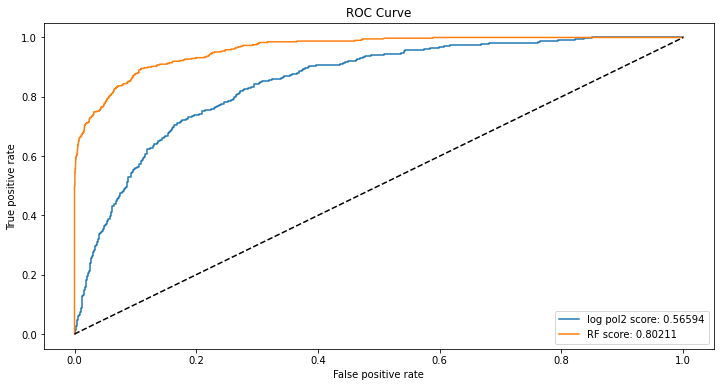

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
#plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score on 1's of 0.95, out of all customers that the model thinks will churn, 88% do actually churn and with the recall score of 0.61 on the 1's, the model is able to highlight 61% of all those who churned.

In [ ]:
df_test = normalize(df_test)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

(904, 7)

In [ ]:
print(classification_report(df_test.Subscribed,  RF.predict(df_test.loc[:, df_test.columns != 'Subscribed'])))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       794
         1.0       0.38      0.33      0.35       110

    accuracy                           0.85       904
   macro avg       0.64      0.63      0.63       904
weighted avg       0.84      0.85      0.85       904



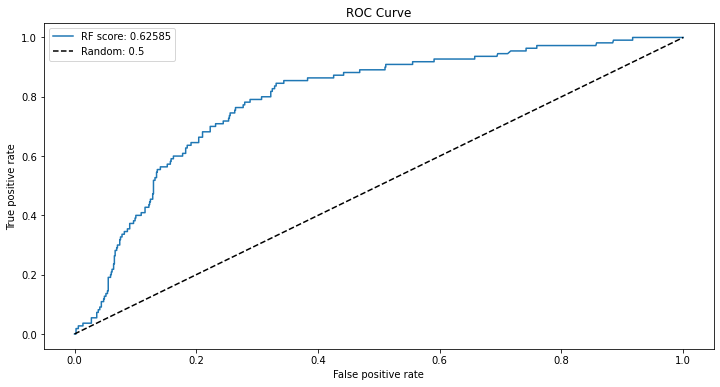

In [ ]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(df_test.Subscribed, RF.predict(df_test.loc[:, df_test.columns != 'Subscribed']),
                                                       RF.predict_proba(df_test.loc[:, df_test.columns != 'Subscribed'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

The precision of the model on previousy unseen test data is slightly higher with regard to predicting 1's i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time while in the meantime working with the model to save the 38% that would have churned :-)